# **ML - Home Work #3**

Stav Suzan Rabinovich\
208661090\
[Link to my Kaggle profile](https://www.kaggle.com/stavsuzanrabinovich)
 

## **About the Titanic**
The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, \
leading to the deaths of more than 1,500 passengers and crew. \


![picture](https://media.giphy.com/media/mYeIp5eruF3jy/giphy.gif) \
*this is not the actual Titanic, this gif was taken from the movie.\
\
\
In this Home Work I'll analyze and evaluate the surviving rate of people (from given data) on the Titanic. \

\
 **This is only HW3! [Press here to see HW1's Notebook](/content/hw1-titanic.html)**


## **Start, Settings and Data Imports**

###**Installations**

In [1]:
# clone the lwlr repo from github
!git clone https://github.com/qiaochen/CourseExercises

fatal: destination path 'CourseExercises' already exists and is not an empty directory.


In [2]:
!pip install seaborn --upgrade
!pip install pandas --upgrade
!pip install --upgrade plotly
!pip install dtale

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.1)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.5)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


### **Imports**

In [3]:
# Import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing

# Data import
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TitanicData/train.csv") # DataFrame of train's CSV file (Read)
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TitanicData/test.csv")   # DataFrame of test's CSV file (Read)

#### **More Imports**
Imports for the HW3's part

In [4]:
import statistics
from statistics import mean
from statistics import variance

from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


from sklearn.cluster import KMeans
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

import dtale
import dtale.app as dtale_app

from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from CourseExercises.lwlr import LWLR
from sklearn.neighbors import KNeighborsRegressor


## **About the Data**

### **Train Data:**

In [5]:
print('There are {} samples'.format(train_df.shape[0]))  # Number of samples
print('There are {} features\n'.format(train_df.shape[1])) # Number of features

train_df.dtypes

There are 891 samples
There are 12 features



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

As we can see, most of the features are numeric (int64,float64).\
Let's check if we can convert some of the features **later on**:

*   `Name` --> Will not effect our calculations. possibly will be deleted later.
*   `Sex` --> Can be transformed to binary.
*   `Ticket` --> Can be transformed to numeric (or binary, depends on the method we will be choosing).
*    `Cabin` --> Might be in use, possibly will be deleted.
*    `Enbarked` --> Can be transformed to numeric (categorical)




In [6]:
train_df.head() # Preview of the train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Test Data:**

In [7]:
print('There are {} samples'.format(test_df.shape[0]))  # Number of samples
print('There are {} features'.format(test_df.shape[1])) # Number of features

test_df.dtypes

There are 418 samples
There are 11 features


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There are the same features in the test_df (except for `Survived`), so the same changes will be in both dfs.

In [8]:
test_df.head() # Preview of the train data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **Features Engineering**

Now we will edit our data to adjust it to the research.

In [9]:
d_train = train_df.copy() # From now on we will use d_train instead of train_df
d_test = test_df.copy()   # From now on we will use d_test instead of test_df

### **Missing Values**

Before making categorical features, we will see what our missing values.

In [10]:
# Checking the nuber of missing values in our df
d_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
d_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# Check

nan_rows = d_train[d_train['Age'].isnull()]
nan_rows = nan_rows.index
print (nan_rows)
d_train
print (d_train.at[4,'Embarked'])
print (d_train.at[5,'Embarked'])

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)
S
Q


As we can see, There are missing values in `Age` and `Cabin` features. \
The `Embarked` and `Fare` is extrimly low (2 of more than 800), so we will fill this data preposition. \
Let's check if we can use those features: 

#### **Cabin**

In [13]:
cabin_mis = (d_train['Cabin'].isnull().sum()/train_df.shape[0])*100
print(f'Percent of missing "Cabin" records is {cabin_mis}')

Percent of missing "Cabin" records is 77.10437710437711


The `Cabin` feature's missing record is to high to estimate - that's why we will **drop** that data 

#### **Age**

In [14]:
age_mis = (d_train['Age'].isnull().sum()/train_df.shape[0])*100
print(f'Percent of missing "Age" records is {age_mis}')

Percent of missing "Age" records is 19.865319865319865


The `Age` feature's missing record **can be handled**.

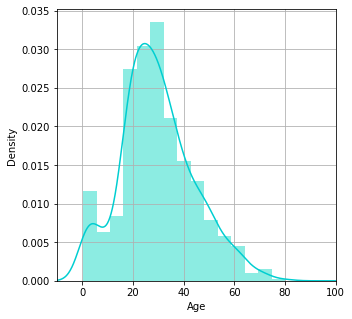

In [15]:
plt.figure(figsize=(5,5))
ax = d_train["Age"].hist(bins=15, density=True, stacked=True, color='turquoise', alpha=0.6)
d_train["Age"].plot(kind='density', color='darkturquoise')
ax.set(xlabel='Age')
plt.xlim(-10,100)
plt.grid()
plt.show()

### **My Functions**

Functions that will help me with filling values later.

In [16]:
def getEstAge(df, pcls, far, emb):      # Returns estimated age.
  fare_var = variance(df['Fare'])                                       # Calculates fare's variace for futer calculation.
  df_filtered = df.copy()                                               # Copy of df to be filtered
  df_filtered = df_filtered.loc[df_filtered['Embarked'].isin([emb])]    # Filter by Embarked
  df_filtered = df_filtered.loc[df_filtered['Pclass'].isin([pcls])]     # Filter by Pclass          
  # Empty Embarked will be handled before.

  if far == 0:                                                        # Filter by fare.
    df_filtered = df_filtered.loc[df_filtered['Fare'].isin([0])]      # If far == 0, probably he is a part of the crew.         
  else:
    df_filtered = df_filtered.loc[(df_filtered['Fare'] >= (far - fare_var)) & (df_filtered['Fare'] <= (far + fare_var)) ]
  
  df_filtered = df_filtered['Age']                                    # df_filter will contain only the age column
  df_filtered = df_filtered.dropna()                                  # Dropping nulls that might intrupt the mean's calculation

  m = df_filtered.mean()                                              # Calculates the mean
  return m                                                            # Returns mean

def fillValues(df):                     # Returns filled data, Cabbin was already dropped.
  df['Fare'].fillna(0, inplace = True)                                # If fare is empty, it's because he is a part of the crew
  
  nan_rows1 = df[df['Embarked'].isnull()]                             # Filling NaNs with 'C'
  nan_rows1 = nan_rows1.index
  for i in nan_rows1:
    df.at[i,'Embarked'] = 'C'

  nan_rows2 = df[df['Age'].isnull()]                                  # Filling NaN with ages by algorithm
  nan_rows2 = nan_rows2.index
  for i in nan_rows2:
    df.at[i, 'Age'] = getEstAge(df, df.at[i,'Pclass'], df.at[i,'Fare'], df.at[i,'Embarked'])
  return df

def fillIfAlone(df):                    # Filling the column if the traveler was alone
  df['isAlone']=np.where((df["SibSp"]+df["Parch"])>0, 0, 1)
  return df


def prepareDF(df):                      # Preparing the data 
  df = df.drop(columns=['Name', 'Cabin', 'Ticket'])    # Dropping unhelpful columns
  df = df.drop(df[((df['Fare'] == 0.0) | (df['Fare'].isna())) &
                  (df['Age'].isna())].index)                          # Too much missing data!
  df = fillValues(df)                                                 # Filling values
  df = fillIfAlone(df)                                                # Adding ifAlone column
  print (df)
  return df

* We will assume that if someone's `Fare` is `NaN` it's because he didn't had to pay, so he was probably a part of the crew.

* From looking at the data , we could see that both empty `Embarked` were females and after looking at the data, we saw that other females with similar fare and other features were at 'C'. 

* The `Age` will be filled by `getEstAge`'s function.

* We can know from `SibSp` and `Parch` if the traveler was lonely or not. we will add to the df `isAlone` column.

### **Data Cleansing**

#### **First Drop Unhelpfuls & Prepare for Encoding**

Dropping the first values that we know for sure that we will NOT use: `Name`,`PassengerId`, `Cabin` and `Ticket`.\
After dropping the first few vars, we will use `fillingValues` function, that will fill missing values.\
Later, we will fill new column that will check if the traveler was alone : `isAlone`.

In [17]:
d_train = prepareDF(d_train)
d_test = prepareDF(d_test)

id_train = d_train['PassengerId'].copy()
id_test = d_test['PassengerId'].copy()

d_train = d_train.drop(columns=['PassengerId'])
d_test = d_test.drop(columns=['PassengerId'])

     PassengerId  Survived  Pclass     Sex  ...  Parch     Fare  Embarked  isAlone
0              1         0       3    male  ...      0   7.2500         S        0
1              2         1       1  female  ...      0  71.2833         C        0
2              3         1       3  female  ...      0   7.9250         S        1
3              4         1       1  female  ...      0  53.1000         S        0
4              5         0       3    male  ...      0   8.0500         S        1
..           ...       ...     ...     ...  ...    ...      ...       ...      ...
886          887         0       2    male  ...      0  13.0000         S        1
887          888         1       1  female  ...      0  30.0000         S        1
888          889         0       3  female  ...      2  23.4500         S        0
889          890         1       1    male  ...      0  30.0000         C        1
890          891         0       3    male  ...      0   7.7500         Q        1

[88

#### **Encoding**

I'll use dummy encoding and will delete binary options (i will drop `sex_male` for example).

In [18]:
d_train = pd.get_dummies(d_train, columns=["Pclass","Embarked","Sex"])
d_train = d_train.drop(columns=['Sex_male'])
d_train.head()

d_test = pd.get_dummies(d_test, columns=["Pclass","Embarked","Sex"])
d_test = d_test.drop(columns=['Sex_male'])
d_test.head()

,Age,SibSp,Parch,Fare,isAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
0,34.5,0,0,7.8292,1,0,0,1,0,1,0,0
1,47.0,1,0,7.0000,0,0,0,1,0,0,1,1
2,62.0,0,0,9.6875,1,0,1,0,0,1,0,0
3,27.0,0,0,8.6625,1,0,0,1,0,0,1,0
4,22.0,1,1,12.2875,0,0,0,1,0,0,1,1


#### **Correlation**

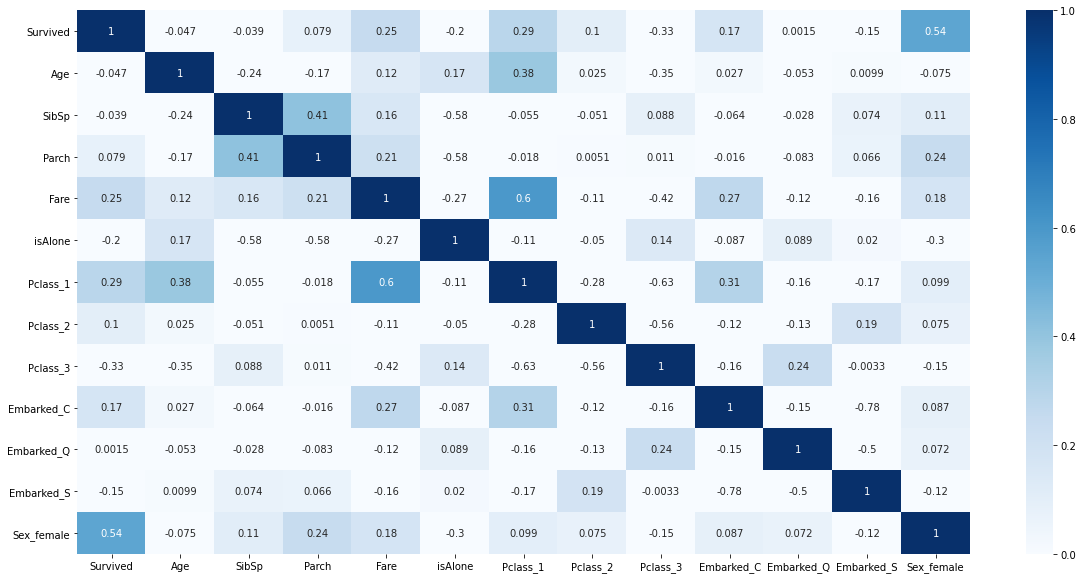

In [19]:
plt.figure(figsize=(20,10))
cor = d_train.corr()
d_train.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.Blues, vmin=0, vmax=1)
plt.show()

We can notice strong correlation between some fatures: \
* `Fare` and `Pclass_1` |0.59|
* `Survived` and `Sex_female` |0.54|
* `Parch` and `SibSp` |0.41|
* `Age` and `Pclass_1` |0.38|
* `Pclass_1` and `Embarked_C` |0.31|
* `Sex_female` and `isAlone` |0.3| 


We could see strong relatinship between difftent fetures, such as: 
* Most of people who bught more expansive tickets are in `Pclass_1`.
* People who paid higher fare has better surviving rate.
* It's more likely that men are traveling alone then women.
* Women has better surviving rate.

## **Models Setup**

We will start with a function that deviding `d_train` to target and features.

In [20]:
def setXt(df):                                # Devides X and t 
  t = df['Survived'].copy()
  print('t')
  display(t)
  print()
  X = df.drop(['Survived'], axis = 1)
  print('X')
  display(X)
  print()
  t.unique()
  return X,t

accuras = []          # Will have all the accuracis

In [21]:
dtale_app.USE_NGROK = True
dtale.show(d_train, ignore_duplicate=True)

http://538222b17fc2.ngrok.io/dtale/main/1

### **NBC**

After using feature selection to get the best features for our target,\
We will use `RFECV` to get our selector.

In [22]:
# divide the data to features and target
d_train_cp = d_train.copy()
X,t = setXt(d_train_cp)

# use feature selection on the data
selector = RFECV(SGDClassifier(random_state=1), cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)).fit(X, t)
display(X.loc[:, selector.support_])

print('MultinomialNB score:', cross_val_score(MultinomialNB(), X.loc[:, selector.support_], t, cv=15).mean())

accuras.append(['NBC',cross_val_score(MultinomialNB(), X.loc[:, selector.support_], t, cv=15).mean()])


t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 883, dtype: int64


X


,Age,SibSp,Parch,Fare,isAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
0,22.000000,1,0,7.2500,0,0,0,1,0,0,1,0
1,38.000000,1,0,71.2833,0,1,0,0,1,0,0,1
2,26.000000,0,0,7.9250,1,0,0,1,0,0,1,1
3,35.000000,1,0,53.1000,0,1,0,0,0,0,1,1
4,35.000000,0,0,8.0500,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,1,0,1,0,0,0,1,0
887,19.000000,0,0,30.0000,1,1,0,0,0,0,1,1
888,25.696552,1,2,23.4500,0,0,0,1,0,0,1,1
889,26.000000,0,0,30.0000,1,1,0,0,1,0,0,0


,Pclass_3,Embarked_S,Sex_female
0,1,1,0
1,0,0,1
2,1,1,1
3,0,1,1
4,1,1,0
...,...,...,...
886,0,1,0
887,0,1,1
888,1,1,1
889,0,0,0


MultinomialNB score: 0.7848431716345218


My score here is 0.7848431716345218 \
Let's try another method.

### **PCA**

We will try make our dim. lower and get the best pca's accuracy.

In [23]:
# convert data points to 2dim with pca
d_train_cp = d_train.copy()

pca = PCA(n_components=2).fit(d_train_cp)
pca_d_train = pd.DataFrame(pca.transform(d_train_cp), columns=['pc1', 'pc2'])
pca_d_train

kmeans = KMeans(n_clusters=4, random_state=1).fit(d_train_cp)     # Cluster with KMeans & show cluster centers
kmeans.cluster_centers_

array([[ 6.59259259e-01,  3.53870086e+01,  9.92592593e-01,
         4.81481481e-01,  7.66332400e+01,  2.96296296e-01,
         8.37037037e-01,  5.18518519e-02,  1.11111111e-01,
         3.85185185e-01,  1.48148148e-02,  6.00000000e-01,
         5.11111111e-01],
       [ 3.22175732e-01,  2.79424738e+01,  4.35146444e-01,
         3.38912134e-01,  1.54434149e+01,  6.68061367e-01,
         9.76290098e-02,  2.38493724e-01,  6.63877266e-01,
         1.45048815e-01,  1.04602510e-01,  7.50348675e-01,
         3.12412831e-01],
       [ 1.00000000e+00,  3.53333333e+01,  0.00000000e+00,
         3.33333333e-01,  5.12329200e+02,  6.66666667e-01,
         1.00000000e+00,  2.77555756e-17,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.33333333e-01],
       [ 6.78571429e-01,  3.17770088e+01,  7.14285714e-01,
         1.10714286e+00,  2.04948064e+02,  2.85714286e-01,
         1.00000000e+00, -2.77555756e-17,  0.00000000e+00,
         3.92857143e-01,  6.93889390e

In [24]:
def round_number_to_closest_int(number, min, max):             # Rounds to closest int
    if number < min:
        return min
    elif number > max:
        return max
    else:
        return round(number)

def round_columns_to_closest_int(df, origin_df, columns):      # Rounds numbers in columns
    for col in columns:
        min_in_col = origin_df[col].min()
        max_in_col = origin_df[col].max()
        df[col] = df[col].apply(lambda s: round_number_to_closest_int(s, min_in_col, max_in_col))
    return df

In [25]:
mean_clusters = pd.DataFrame(kmeans.cluster_centers_, columns=d_train_cp.columns)             # Show means of the clusters
mean_clusters = round_columns_to_closest_int(mean_clusters, d_train_cp, d_train_cp.columns)

mean_clusters_cp = mean_clusters.copy()
mean_clusters_cp.replace('empty', np.NaN, inplace=True)
print("Mean Clusters: ")
display(mean_clusters_cp)

pca_mean_clusters = pd.DataFrame(pca.transform(mean_clusters), columns=['pc1', 'pc2'])        # Convert cluster centers to 2dim with pca
print("\n\nPCA Mean Clusters:")
display(pca_mean_clusters)

fig = px.scatter(pca_mean_clusters, x='pc1', y='pc2', color=pca_mean_clusters.index)          # Presents cluster centers on a graph
fig.show()

Mean Clusters: 


,Survived,Age,SibSp,Parch,Fare,isAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
0,1,35,1,0,77.0000,0,1,0,0,0,0,1,1
1,0,28,0,0,15.0000,1,0,0,1,0,0,1,0
2,1,35,0,0,512.3292,1,1,0,0,1,0,0,0
3,1,32,1,1,205.0000,0,1,0,0,0,0,1,1




PCA Mean Clusters:


,pc1,pc2
0,44.689166,4.187466
1,-17.537213,-0.590596
2,479.719160,-11.218959
3,172.499242,-3.361261


Here we could see the clusters centers on a graph of two dimensions with the help of PCA for dimensionality reduction.

---


In [26]:
pca_mean_clusters_cp = pca_mean_clusters.copy()                       
pca_mean_clusters_cp['cluster'] = kmeans.predict(mean_clusters)       # Add Cluster column to the df
display(pca_mean_clusters_cp)

pca_d_train_cp = pca_d_train.copy()
pca_d_train_cp['cluster'] = kmeans.predict(d_train_cp)                # Add Cluster column to the df
display(pca_d_train_cp)


fig = go.Figure()                                                     # Presents data points and cluster centers together (each color means a cluster)
fig.add_trace(go.Scatter(x=pca_mean_clusters_cp.pc1, y=pca_mean_clusters_cp.pc2, mode='markers', marker=dict(size=20, symbol='cross', color=pca_mean_clusters_cp.cluster)))
fig.add_trace(go.Scatter(x=pca_d_train_cp.pc1, y=pca_d_train_cp.pc2, mode='markers' ,marker=dict(color=pca_d_train_cp.cluster)))
fig.show()

,pc1,pc2,cluster
0,44.689166,4.187466,0
1,-17.537213,-0.590596,1
2,479.719160,-11.218959,2
3,172.499242,-3.361261,3


,pc1,pc2,cluster
0,-25.489122,-6.338966,1
1,39.086571,7.385518,0
2,-24.674308,-2.344110,1
3,20.805364,5.035059,0
4,-24.233742,6.648118,1
...,...,...,...
878,-19.568050,-1.506177,1
879,-2.853636,-10.098111,1
880,-9.160141,-3.249956,1
881,-2.602965,-3.103596,1


Here, we connected the two graphs and show a graph with the cluster centers and the data points together. 

---



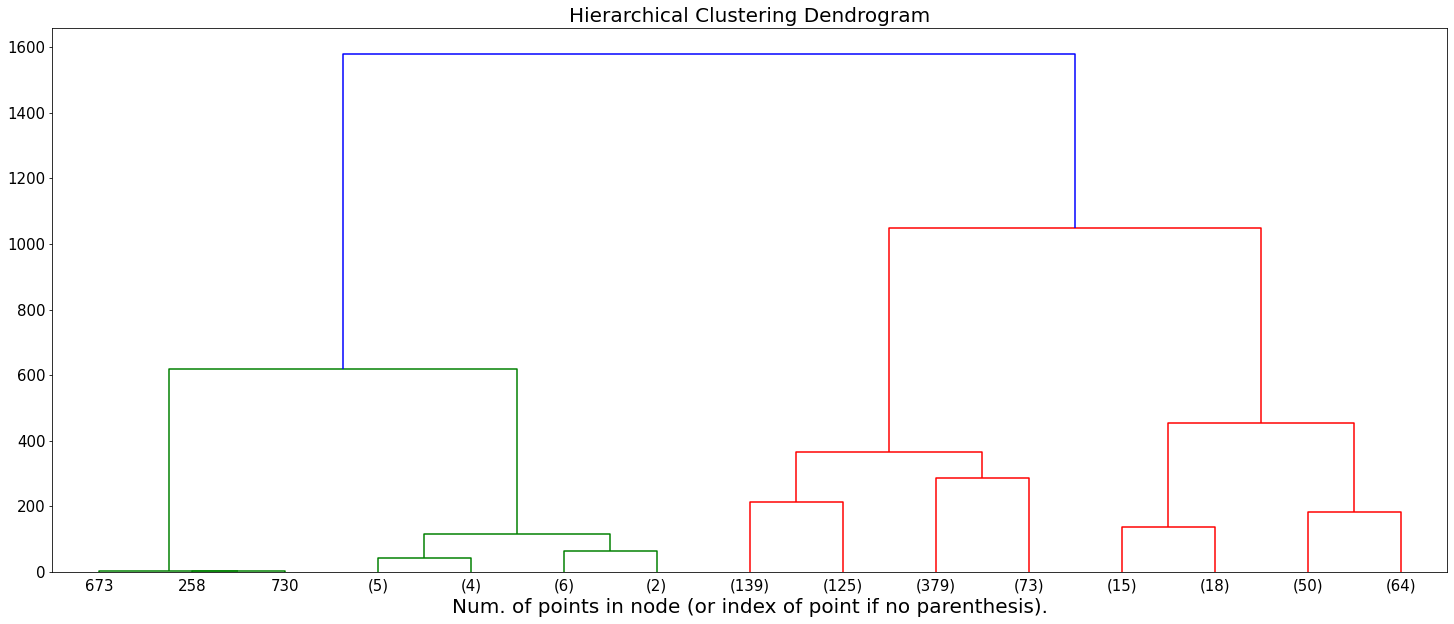

In [27]:
def plot_dendrogram(model, **kwargs):                   # Calculates Hierarchical Clustering and plot dendogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg = agg.fit(d_train_cp)
plt.figure(figsize=(25, 10))
plot_dendrogram(agg, truncate_mode='level', p=3)

plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel("Num. of points in node (or index of point if no parenthesis).", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [28]:
# use grid search to find best pca component on the data for nbc

model_pipe = Pipeline([('pca', 'passthrough'), ('nbc', GaussianNB())])
hyper_parameters = {'pca': [PCA()], 'pca__n_components': list(range(1, len(X.columns)-3))}

gs_model1 = GridSearchCV(model_pipe, hyper_parameters).fit(X, t)
print('Accuracy score for classification:')
print('gs_model', gs_model1.best_score_)
print('best params', gs_model1.best_params_)

accuras.append(['GridSearch with Model_pipe',gs_model1.best_score_])

Accuracy score for classification:
gs_model 0.7882318952234206
best params {'pca': PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'pca__n_components': 7}


We got accuracy of 0.7882318952234206, which is better than NBC's accuracy.\
Let's try another model:

###**Hyper - Parameters**
We will get the accuracy with **GridSearch** and then with **RandomSearch**

In [29]:
# GridSearch and getting the best parameters
X_normalized = StandardScaler().fit_transform(X)
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1]}

gs_model2 = GridSearchCV(SGDClassifier(random_state=1), hyper_parameters).fit(X_normalized, t)
print('Accuracy score for classification:')
print('gs_model2', gs_model2.best_score_)
print('best params', gs_model2.best_params_)

accuras.append(['GridSearch with SGD',gs_model2.best_score_])

Accuracy score for classification:
gs_model2 0.7984013867488444
best params {'alpha': 0.001, 'penalty': 'elasticnet'}


In [30]:
# RandomSearch and getting the best parameters
np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'])

rs_model = RandomizedSearchCV(SGDClassifier(), distributions, random_state=1).fit(X_normalized, t)
print('Accuracy score for classification:')
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

Accuracy score for classification:
rs_model 0.787069851052902
best params {'alpha': 0.3879107411620074, 'penalty': 'l2'}


### **Ensembles**
We will try 3 options:

#### **Bagging**
We will get the score using NFold bagging.

In [31]:
bag_fold_model = BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=20, random_state=1, bootstrap=False).fit(X_normalized, t)
print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model.score(X_normalized, t).mean())

accuras.append(['Bag Fold Model',bag_fold_model.score(X_normalized, t).mean()])

Accuracy score for classification:
bag_fold_model 0.8074745186862967


#### **Bootstrap Bagging**

In [32]:
bag_boot_model = BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=20, random_state=1, bootstrap=True).fit(X_normalized, t)
print('Accuracy score for classification:')
print('bag_boot_model', bag_boot_model.score(X_normalized, t).mean())

accuras.append(['Bag Bootstrap Model',bag_boot_model.score(X_normalized, t).mean()])


Accuracy score for classification:
bag_boot_model 0.8063420158550396


#### **Ada Boost**


In [33]:
ada_boost_model = AdaBoostClassifier(n_estimators=100, random_state=1).fit(X_normalized, t)
print('Accuracy score for classification:')
print('ada_boost_model', ada_boost_model.score(X_normalized, t).mean())

accuras.append(['Ada Boost Model',ada_boost_model.score(X_normalized, t).mean()])

Accuracy score for classification:
ada_boost_model 0.8425821064552661


### **KNN**

In [34]:
arr_X_normalized = np.asarray(X_normalized)

hyper_parameters = {'n_neighbors': list(range(1, 20))} # run KNN on the dataset and find best K by accuracy

gs_neigh_model = GridSearchCV(KNeighborsClassifier(n_neighbors=5), hyper_parameters).fit(arr_X_normalized, t)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

accuras.append(['GridSearch KNN',gs_neigh_model.best_score_])

Accuracy score for classification:
gs_neigh_model 0.7972971237801747
best params {'n_neighbors': 10}


### **Guessing what is the best model for us**

In [35]:
print(accuras)
ac_scores = [row[1] for row in accuras]
print(ac_scores)
max_s = max(ac_scores)
print(max_s)


[['NBC', 0.7848431716345218], ['GridSearch with Model_pipe', 0.7882318952234206], ['GridSearch with SGD', 0.7984013867488444], ['Bag Fold Model', 0.8074745186862967], ['Bag Bootstrap Model', 0.8063420158550396], ['Ada Boost Model', 0.8425821064552661], ['GridSearch KNN', 0.7972971237801747]]
[0.7848431716345218, 0.7882318952234206, 0.7984013867488444, 0.8074745186862967, 0.8063420158550396, 0.8425821064552661, 0.7972971237801747]
0.8425821064552661


The best score is of the Ada Boost Model , so I'll guess that it will be the best score for the test either.

## **Preparing the Test Set**

The d_test is ready to be calculated. \
Let's see what is the best prediction: 

#### **NBC Model**

In [36]:
model = MultinomialNB()
model.fit(X,t)
preds = model.predict(d_test)
sbm_NBC = pd.DataFrame({'PassengerId': id_test, 'Survived': preds})
sbm_NBC.to_csv('sbm_NBC.csv',index=False)

####**PCA Model**

In [37]:
# PCA Model

model_pipe = Pipeline([('pca', 'passthrough'), ('nbc', GaussianNB())])
hyper_parameters = {'pca': [PCA()], 'pca__n_components': list(range(1, len(X.columns)-3))}

model = GridSearchCV(model_pipe, hyper_parameters)
model.fit(X, t)
preds = model.predict(d_test)
sbm_PCA = pd.DataFrame({'PassengerId': id_test, 'Survived': preds})
sbm_PCA.to_csv('sbm_PCA.csv',index=False)



####**GridSearch Model**

In [38]:
X_normalized = StandardScaler().fit_transform(X)
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1]}

model = GridSearchCV(SGDClassifier(random_state=1), hyper_parameters)
model.fit(X_normalized, t)
preds = model.predict(d_test)
sbm_GS = pd.DataFrame({'PassengerId': id_test, 'Survived': preds})
sbm_GS.to_csv('sbm_GS.csv',index=False)


####**RandomSearch Model**

In [39]:
np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'])

model = RandomizedSearchCV(SGDClassifier(), distributions, random_state=1)
model.fit(X_normalized, t)

preds = model.predict(d_test)
sbm_RS = pd.DataFrame({'PassengerId': id_test, 'Survived': preds})
sbm_RS.to_csv('sbm_RS.csv',index=False)


####**Bagging Model**

In [40]:
model = BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=20, random_state=1, bootstrap=False)
model.fit(X_normalized, t)

preds = model.predict(d_test)
sbm_Bg = pd.DataFrame({'PassengerId': id_test, 'Survived': preds})
sbm_Bg.to_csv('sbm_Bg.csv',index=False)

####**Bootstrap Bagging Model**

In [41]:
model = BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=20, random_state=1, bootstrap=True)
model.fit(X_normalized, t)

preds = model.predict(d_test)
sbm_BB = pd.DataFrame({'PassengerId': id_test, 'Survived': preds})
sbm_BB.to_csv('sbm_BB.csv',index=False)

####**Ada Boost Model**

In [42]:
model = AdaBoostClassifier(n_estimators=100, random_state=1)
model.fit(X_normalized, t)

preds = model.predict(d_test)
sbm_AB = pd.DataFrame({'PassengerId': id_test, 'Survived': preds})
sbm_AB.to_csv('sbm_AB.csv',index=False)

####**KNN Model**

In [43]:
arr_X_normalized = np.asarray(X_normalized)
hyper_parameters = {'n_neighbors': list(range(1, 20))}

model = GridSearchCV(KNeighborsClassifier(n_neighbors=5), hyper_parameters)
model.fit(arr_X_normalized, t)
preds = model.predict(d_test)
sbm_KNN = pd.DataFrame({'PassengerId': id_test, 'Survived': preds})
sbm_KNN.to_csv('sbm_KNN.csv',index=False)

## **Results**

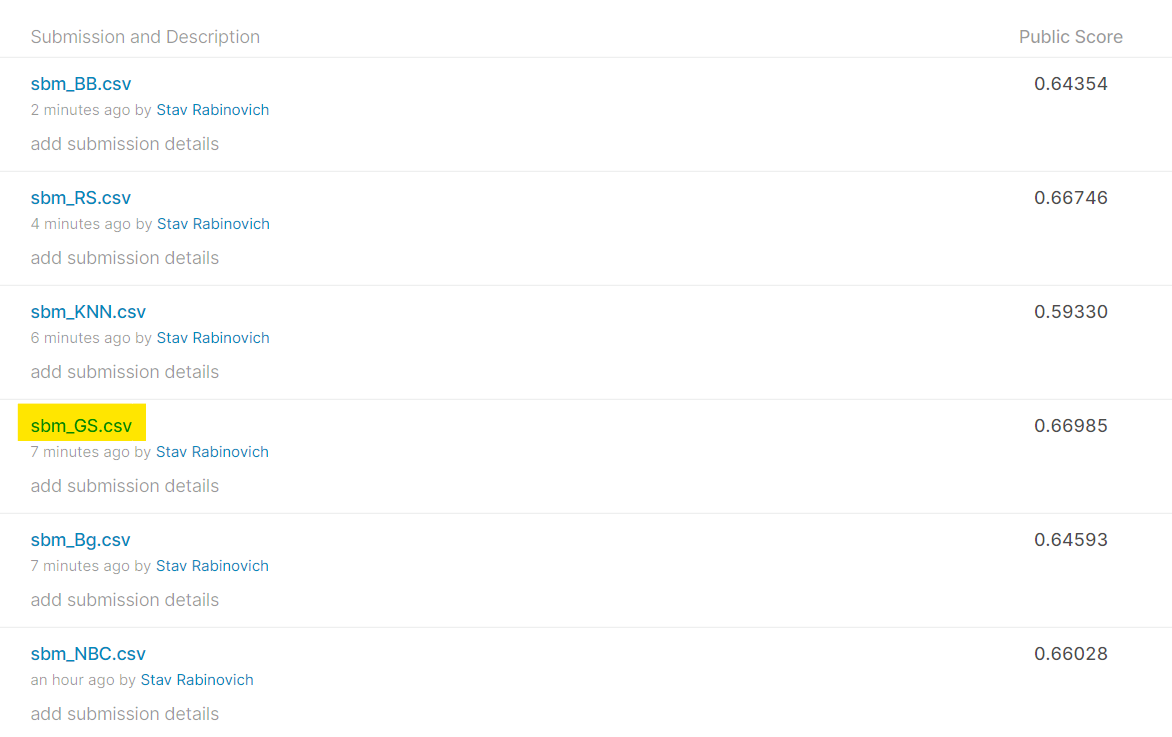

##**Summary**
In this project, I believe that my understanding (of models and the material itself) of the material became more significant.\
I understood what I did, the difference between different models, and how to make them.

\
The resutls was not high, but I think that I did not let the model be trained enought, and if I let it be trained more (and maybe remove more low correlatied features), it was higher.

## **References :**

Some of the research was taken from [HW1 Notebook](/content/hw1-titanic.html). \
Litte "extra" was inspired by [Dmitry Tchenak's Notebook](/content/DmitryML2020E1.html) (from the moudle). \
About the titanic - [History.com](https://www.history.com/topics/early-20th-century-us/titanic) \
Seaborn options - [Seaborn.pydata.org](https://seaborn.pydata.org/tutorial/color_palettes.html) \
Those notebooks helped me to explore the data - [Notebook1](https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python#2.-Data-Quality-&-Missing-Value-Assessment) & [Notebook2](https://www.kaggle.com/padmanabhabanerjee/a-noob-s-first-approach-to-the-titanic-dataset#Playing-with-data-:)\
About the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).\

And also Aviad's Notebooks (7 & 8).

